# Recommandation System Using Matrix Factorization

In [ ]:
!pip install numpy

In [ ]:
!pip install os

In [ ]:
!pip install pandas

In [ ]:
!pip install sklearn

In [ ]:
!pip install tensorflow == 1.13.1 

In [ ]:
!pip install Keras

In [2]:
# Importing all the libraries

import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
pd.options.display.max_columns= None

# Imporatnat libraries for the creating model
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam

In [3]:
# Define the path for the dataset

DATA_FOLDER = Path('data/ml-latest-small')
MOVIES_FILEPATH = DATA_FOLDER / 'movies.csv'
RATINGS_FILEPATH = DATA_FOLDER / 'ratings.csv'

In [4]:
# Read the ratings.csv file

ratings = pd.read_csv(RATINGS_FILEPATH)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
#reindex the userId and movieId by 0 instead of 1 because noisy matrix give inaccurate score
 
ratings.userId = ratings.userId.astype('category').cat.codes.values
ratings.movieId = ratings.movieId.astype('category').cat.codes.values
ratings

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,2,4.0,964981247
2,0,5,4.0,964982224
3,0,43,5.0,964983815
4,0,46,5.0,964982931
5,0,62,3.0,964982400
6,0,89,5.0,964980868
7,0,97,4.0,964982176
8,0,124,5.0,964984041
9,0,130,5.0,964984100


In [6]:
# Create the train and test dataset

train, test = train_test_split(ratings, test_size = 0.20)

In [8]:
n_user = len(ratings.userId.unique())
n_user

610

In [9]:
n_movies = len(ratings.movieId.unique())
n_movies

9724

In [10]:
n_latent_factors = 20

# Sparse Matrix: (M X N)
# M = n_movies
# N = n_users
# movie_embedding = n_movies factorized with the n_latent_factors (M X n_latent_factors)
# user_embedding = n_users factorized with the n_latent_factors (N X n_latent_factors)
# Matrix multiplication of which produces the original matrix.

In [11]:
# Input() is used to instantiate a Keras tensor.
movie_input = keras.layers.Input(shape = [1], name = 'item')

# Turns positive integers into dense vector of fixed size.
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name = 'Movie_Embedding')(movie_input)

# Flattens the input. Does not affect the batch size.
#If inputs are shaped (batch,) without a channel dimension, then flattening adds an extra channel dimension and output shapes are (batch, 1).
movie_vec = keras.layers.Flatten(name = "Flatten_Movies")(movie_embedding)


user_input = keras.layers.Input(shape = [1], name = "User")
user_vec = keras.layers.Flatten(name = 'Flatten_User')(keras.layers.Embedding(n_user + 1, n_latent_factors,
                                                                            name = 'user_embedding')(user_input))

prod = keras.layers.dot([movie_vec, user_vec], axes = 1, name = "Dot_Product")

model = keras.Model([user_input, movie_input], prod)


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Configure the model foor training
model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie_Embedding (Embedding)     (None, 1, 20)        194500      item[0][0]                       
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 20)        12220       User[0][0]                       
__________________________________________________________________________________________________
Flatten_Mo

In [18]:
# Train model for fix number of epochs
history = model.fit([train.userId, train.movieId], train.rating, epochs = 100, verbose = 0)

Instructions for updating:
Use tf.cast instead.


Text(0, 0.5, 'training error')

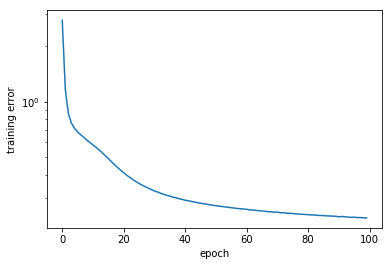

In [19]:
# Plot the loss 

import matplotlib.pyplot as plt
pd.Series(history.history['loss']).plot(logy = True)
plt.xlabel('epoch')
plt.ylabel('training error')

In [20]:
# Evaluate the model. Generate the ratings for each user and movie pair on the test set and then calculate error.

result = model.evaluate((test.userId, test.movieId), test.rating, batch_size = 1)

20168/20168 [==============================] - 13s 667us/sample - loss: 0.9441


###### LATENT EMBEDDING OPTIMIZATION

In [22]:
#Obtain embedding matrics
movie_embedding_learnt = model.get_layer(name = 'Movie_Embedding').get_weights()[0] # Weights of layer stored here
pd.DataFrame(movie_embedding_learnt).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000
mean,-0.307946,0.310782,0.304399,-0.295132,0.308493,0.303109,0.290564,0.306163,-0.304423,-0.302138,0.304222,-0.300782,-0.168303,-0.311682,0.290131,-0.299886,0.304063,-0.307889,-0.266467,0.306328
std,0.239982,0.230166,0.247788,0.253585,0.241553,0.242168,0.250318,0.241122,0.247419,0.259392,0.247747,0.243358,0.374637,0.229966,0.273980,0.243800,0.237750,0.241544,0.300161,0.240893
min,-1.737501,-1.141288,-1.270815,-2.159141,-1.033545,-1.144813,-1.105488,-1.022646,-1.661290,-2.006973,-1.287442,-1.841191,-2.365618,-1.586179,-1.341437,-2.087745,-1.138495,-1.719157,-2.180830,-0.921350
25%,-0.429503,0.191252,0.163914,-0.429995,0.173403,0.168145,0.152653,0.177544,-0.431416,-0.429160,0.164716,-0.422656,-0.393615,-0.424030,0.128879,-0.418470,0.177129,-0.429698,-0.433162,0.176977
50%,-0.325635,0.322760,0.323457,-0.315397,0.321096,0.315412,0.308862,0.321413,-0.321997,-0.317200,0.318497,-0.315933,-0.179901,-0.325260,0.312186,-0.312432,0.314870,-0.324859,-0.291015,0.323439
75%,-0.178577,0.424963,0.431913,-0.142795,0.435007,0.423385,0.418128,0.428235,-0.159911,-0.154070,0.428954,-0.172639,0.070816,-0.189620,0.434946,-0.166852,0.421142,-0.168005,-0.054111,0.426381
max,1.123650,2.010796,1.664672,1.275106,1.611156,1.924788,2.009752,1.958851,1.298461,1.275005,1.999664,1.048171,1.998114,0.876610,2.079051,1.295834,1.615551,1.375215,1.183353,2.222150


In [23]:
user_embedding_learnt = model.get_layer(name = "user_embedding").get_weights()[0]
pd.DataFrame(user_embedding_learnt).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,-0.475266,0.525890,0.454236,-0.503766,0.483534,0.498580,0.498870,0.501789,-0.487090,-0.461696,0.464447,-0.524880,-0.492518,-0.479793,0.480852,-0.522354,0.516036,-0.487169,-0.513580,0.452899
std,0.546594,0.509026,0.550893,0.536266,0.545713,0.543715,0.512589,0.524947,0.566228,0.622820,0.580680,0.512946,0.562802,0.539683,0.577494,0.533083,0.538715,0.525011,0.631514,0.556066
min,-2.092933,-1.120569,-1.046276,-2.213733,-1.196245,-1.326844,-1.441421,-1.244680,-2.751132,-2.400838,-1.835243,-1.892595,-3.224429,-1.912142,-1.812925,-2.312106,-1.209119,-2.100727,-3.420679,-1.919209
25%,-0.827589,0.213529,0.097121,-0.833554,0.132800,0.150111,0.172870,0.143778,-0.866785,-0.846413,0.121368,-0.873021,-0.835692,-0.839966,0.120941,-0.867088,0.193333,-0.836247,-0.887842,0.093483
50%,-0.490127,0.537037,0.479843,-0.507039,0.494468,0.509557,0.536230,0.531652,-0.490698,-0.471302,0.519021,-0.530527,-0.465906,-0.487046,0.471470,-0.541600,0.539039,-0.522173,-0.518004,0.465980
75%,-0.148027,0.831844,0.787567,-0.171628,0.830810,0.848440,0.807565,0.839432,-0.142504,-0.087092,0.828279,-0.187358,-0.117806,-0.168866,0.843740,-0.177930,0.875959,-0.136204,-0.112592,0.804619
max,1.495206,2.206879,2.225034,1.394193,2.856579,2.374602,2.201334,2.203285,1.714922,1.634405,1.982540,1.316583,1.820685,1.270210,2.921800,1.495014,2.725176,1.480134,1.825265,2.408206


In [ ]:
# Recommand the movie

In [24]:
def recommand(userId, n_movies = 5):
    movies = user_embedding_learnt[userId]@movie_embedding_learnt.T
    mids = np.argpartition(movies, -n_movies)[-n_movies:]  #Perform an indirect partition   
    return mids

In [27]:
recommand(userId = 5)

array([2597, 1822, 1306, 1030, 1044], dtype=int64)